In [1]:
print("selected dataset: ML-EdgeIIoT-dataset.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

selected dataset: ML-EdgeIIoT-dataset.csv


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [30]:
df = pd.read_csv("ML-EdgeIIoT-dataset.csv", low_memory = False)
visual_df = df.copy()
df.head()
df_labels = df[["Attack_label"]]
df_types = df[["Attack_type"]]
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [ ]:
df.columns

In [4]:
# Dropping the unnecessary attributes
df.drop(["http.file_data", "http.content_length", "http.request.uri.query",
"http.request.method", "http.referer", "http.request.full_uri",
"http.request.version", "http.response", "http.tls_port", "dns.qry.name", "dns.qry.name.len", "dns.qry.qu",
"dns.qry.type", "dns.retransmission", "dns.retransmit_request",
"dns.retransmit_request_in", "mqtt.conack.flags",
"mqtt.conflag.cleansess", "mqtt.conflags", "mqtt.hdrflags", "mqtt.len",
"mqtt.msg_decoded_as", "mqtt.msg", "mqtt.msgtype", "mqtt.proto_len",
"mqtt.protoname", "mqtt.topic", "mqtt.topic_len", "mqtt.ver","tcp.connection.fin",
"tcp.connection.rst", "tcp.connection.syn", "tcp.connection.synack",
"tcp.dstport", "tcp.flags", "tcp.flags.ack", "tcp.len", "tcp.options",
"tcp.payload", "tcp.seq", "tcp.srcport"
], inplace = True, axis = 1)
df.shape

KeyError: "['http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport'] not found in axis"

In [4]:
df.columns.nunique()

22

In [32]:
# Converting the ip.src_host to int
import ipaddress
def ip_to_int(ip_address):
  try:
    return int(ipaddress.IPv4Address(ip_address))
  except:
    if (ip_address == "0.0") or (ip_address == "0"):
      return 0
    else:
      return np.nan

df["ip.src_host"] = df["ip.src_host"].apply(ip_to_int)
df["arp.dst.proto_ipv4"] = df["arp.dst.proto_ipv4"].apply(ip_to_int)
df["arp.src.proto_ipv4"] = df["arp.src.proto_ipv4"].apply(ip_to_int)
df["ip.dst_host"] = df["ip.dst_host"].apply(ip_to_int)

In [62]:
df[["ip.src_host", "ip.dst_host", "arp.dst.proto_ipv4", "arp.src.proto_ipv4"]]

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.src.proto_ipv4
0,3232235672,0,0,0
1,3232235621,0,0,0
2,3232235672,0,0,0
3,3232235621,0,0,0
4,3232235672,0,0,0
...,...,...,...,...
157795,3247985195,3232235648,0,0
157796,4248043989,3232235648,0,0
157797,1805376817,3232235648,0,0
157798,1307720420,3232235648,0,0


In [6]:
df.dropna(subset = ["ip.src_host", "ip.dst_host", "arp.src.proto_ipv4", "arp.dst.proto_ipv4"], inplace = True)

In [12]:
df["frame.time"].value_counts()

frame.time
0000 00:00:00.000000000       15705
2021-01-01 23:12:11.894359        2
2021-01-01 17:58:35.612142        1
2021-01-01 17:58:35.552796        1
2021-01-01 17:58:35.598107        1
                              ...  
2021-01-01 19:06:22.176872        1
2021-01-01 19:06:22.169995        1
2021-01-01 19:06:22.141551        1
2021-01-01 19:06:22.113326        1
2021-01-01 23:24:32.780376        1
Name: count, Length: 142095, dtype: int64

In [7]:
len(df["Attack_type"].unique())

15

In [110]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,tcp.ack_raw,tcp.checksum,udp.port,udp.stream,udp.time_delta,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,3232235621,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,3232235621,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [8]:
# Counting the unique values for each columns
for col in df.columns:
  df[col].nunique
  print(col, df[col].nunique())

frame.time 155186
ip.src_host 19089
ip.dst_host 8083
arp.dst.proto_ipv4 7
arp.opcode 3
arp.hw.size 2
arp.src.proto_ipv4 6
icmp.checksum 13187
icmp.seq_le 13824
icmp.transmit_timestamp 84
icmp.unused 1
tcp.ack 27929
tcp.ack_raw 94716
tcp.checksum 55513
udp.port 32
udp.stream 14492
udp.time_delta 39
mbtcp.len 1
mbtcp.trans_id 1
mbtcp.unit_id 1
Attack_label 2
Attack_type 15


Handling the frame.time

In [33]:
import swifter
def handle_frame(row):
  try:
    row = pd.to_datetime(row, format = "%Y %H:%M:%S.%f")
    return row
  except ValueError:
    try:
      return pd.to_datetime(row, format="%Y %d:%m:%S.%f")
    except:
      return pd.NaT
df["frame.time"] = df["frame.time"].swifter.apply(handle_frame)

Pandas Apply: 100%|██████████| 157800/157800 [00:12<00:00, 12721.89it/s]


In [10]:
df.head(5)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,tcp.ack_raw,tcp.checksum,udp.port,udp.stream,udp.time_delta,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,NaT,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,NaT,3232235621,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,NaT,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,NaT,3232235621,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,NaT,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [34]:
# Handle the NaT
mean_value_of_dates = df["frame.time"].dropna().mean()
df["frame.time"] = df["frame.time"].fillna(mean_value_of_dates)

In [44]:
df.dtypes

ip.src_host                  int64
ip.dst_host                  int64
arp.dst.proto_ipv4           int64
arp.opcode                 float64
arp.hw.size                float64
arp.src.proto_ipv4           int64
icmp.checksum              float64
icmp.seq_le                float64
icmp.transmit_timestamp    float64
tcp.ack                    float64
tcp.ack_raw                float64
tcp.checksum               float64
udp.port                   float64
udp.stream                 float64
udp.time_delta             float64
Attack_label                 int64
Attack_type                 object
year                       float64
month                      float64
day                        float64
hour                       float64
minute                     float64
second                     float64
microsecond                float64
dtype: object

In [35]:
len(df["Attack_type"].unique())

15

In [36]:
df['year'] = df['frame.time'].dt.year
df['month'] = df['frame.time'].dt.month
df['day'] = df['frame.time'].dt.day
df['hour'] = df['frame.time'].dt.hour
df['minute'] = df['frame.time'].dt.minute
df['second'] = df['frame.time'].dt.second
df['microsecond'] = df['frame.time'].dt.microsecond

In [27]:
df.shape

(157800, 29)

In [37]:
df.drop("frame.time", axis = 1, inplace = True)

In [60]:
df.isna().sum()

ip.src_host                0
ip.dst_host                0
arp.dst.proto_ipv4         0
arp.opcode                 0
arp.hw.size                0
arp.src.proto_ipv4         0
icmp.checksum              0
icmp.seq_le                0
icmp.transmit_timestamp    0
icmp.unused                0
tcp.ack                    0
tcp.ack_raw                0
tcp.checksum               0
udp.port                   0
udp.stream                 0
udp.time_delta             0
mbtcp.len                  0
mbtcp.trans_id             0
mbtcp.unit_id              0
Attack_label               0
Attack_type                0
year                       0
month                      0
day                        0
hour                       0
minute                     0
second                     0
microsecond                0
dtype: int64

In [14]:
# checking columns with the 0.0 value in each row
zero_col_list = []
def zero_col(df):
  for col in df.columns:
    if (df[col] == 0.0).all():
      zero_col_list.append(col)
zero_col(df)
zero_col_list

['icmp.unused', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id']

In [15]:
# droping the columns containing only 0.0 in each rows
df.drop(zero_col_list, axis = 1, inplace = True)
print(df.columns.nunique())

24


In [16]:
len(df["Attack_type"].unique())

15

In [33]:
df["Attack_type"].unique()

array(['MITM', 'Fingerprinting', 'Ransomware', 'Uploading',
       'SQL_injection', 'DDoS_HTTP', 'DDoS_TCP', 'Password',
       'Port_Scanning', 'Vulnerability_scanner', 'Backdoor', 'XSS',
       'Normal', 'DDoS_UDP', 'DDoS_ICMP'], dtype=object)

In [36]:
df.to_csv("cleaned_dataset.csv", index = False)

In [ ]:
df.dtypes.value_counts()

,count
float64,11
int32,7
int64,5
object,1


In [ ]:
df.columns.nunique()

24

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142095 entries, 1214 to 157799
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ip.src_host              142095 non-null  int64  
 1   ip.dst_host              142095 non-null  int64  
 2   arp.dst.proto_ipv4       142095 non-null  int64  
 3   arp.opcode               142095 non-null  float64
 4   arp.hw.size              142095 non-null  float64
 5   arp.src.proto_ipv4       142095 non-null  int64  
 6   icmp.checksum            142095 non-null  float64
 7   icmp.seq_le              142095 non-null  float64
 8   icmp.transmit_timestamp  142095 non-null  float64
 9   tcp.ack                  142095 non-null  float64
 10  tcp.ack_raw              142095 non-null  float64
 11  tcp.checksum             142095 non-null  float64
 12  udp.port                 142095 non-null  float64
 13  udp.stream               142095 non-null  float64
 14  udp.ti

In [ ]:
df.shape

(142095, 24)

In [ ]:
print(df.select_dtypes(include = "object").columns)

Index(['Attack_type'], dtype='object')


In [ ]:
print(df.select_dtypes(include = ["float64", "int64"]).columns)

Index(['ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode',
       'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le',
       'icmp.transmit_timestamp', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum',
       'udp.port', 'udp.stream', 'udp.time_delta', 'Attack_label'],
      dtype='object')


In [24]:
df.dtypes.value_counts()

float64    18
int64       5
object      1
Name: count, dtype: int64

Handling other object types

In [ ]:
print("The object attributes including labels: ", df.select_dtypes(include = "object").columns)
cat_cols = df.select_dtypes(include = "object").columns
cat_cols = [item for item in cat_cols if item not in ["Attack_label", "Attack_type"]]
print("The object type attributes excluding labels: ", cat_cols)

The object attributes including labels:  Index(['Attack_type'], dtype='object')
The object type attributes excluding labels:  []


In [ ]:
df[cat_cols] = df[cat_cols].astype("category")
df[cat_cols].columns

Index([], dtype='object')

In [ ]:
df.dtypes[df.dtypes == "category"]

,0


In [ ]:
df.shape

(142095, 24)

# Labels of Attack_type

In [ ]:
# now handling the Attack_type categories
df_types["Attack_type"].value_counts()

,count
Attack_type,
Normal,24301
DDoS_UDP,14498
DDoS_ICMP,14090
Ransomware,10925
DDoS_HTTP,10561
SQL_injection,10311
Uploading,10269
DDoS_TCP,10247
Backdoor,10195


# Visualizations

C:\Users\nitin\AppData\Local\Temp\ipykernel_10032\3277684605.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_srcs.index, rotation = 90)
C:\Users\nitin\AppData\Local\Temp\ipykernel_10032\3277684605.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_dsts.index, rotation = 90)


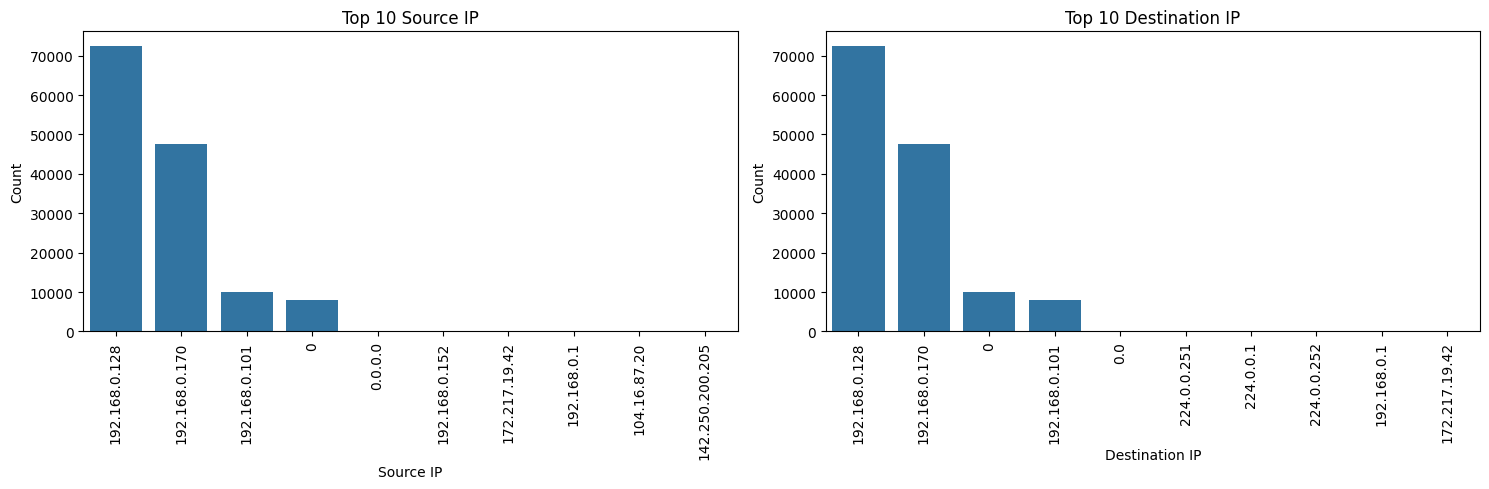

In [35]:
# top sources
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
top_srcs = visual_df["ip.src_host"].value_counts().head(10)
sns.barplot(x = top_srcs.index, y = top_srcs, ax = axes[0])
axes[0].set_xticklabels(top_srcs.index, rotation = 90)
axes[0].set_xlabel("Source IP")
axes[0].set_ylabel("Count")
axes[0].set_title("Top 10 Source IP")

# top destinations
top_dsts = visual_df["ip.dst_host"].value_counts().head(10)
sns.barplot(x = top_dsts.index, y = top_srcs, ax = axes[1])
axes[1].set_xticklabels(top_dsts.index, rotation = 90)
axes[1].set_xlabel("Destination IP")
axes[1].set_ylabel("Count")
axes[1].set_title("Top 10 Destination IP")
plt.tight_layout()
plt.show()

In [36]:
numerical_df = visual_df.select_dtypes(include = ["float64", "int64"])
numerical_df.corr()["Attack_label"].sort_values(ascending = False).head()

Attack_label          1.000000
icmp.seq_le           0.121194
icmp.checksum         0.116663
udp.stream            0.110240
tcp.connection.syn    0.101786
Name: Attack_label, dtype: float64

<Axes: >

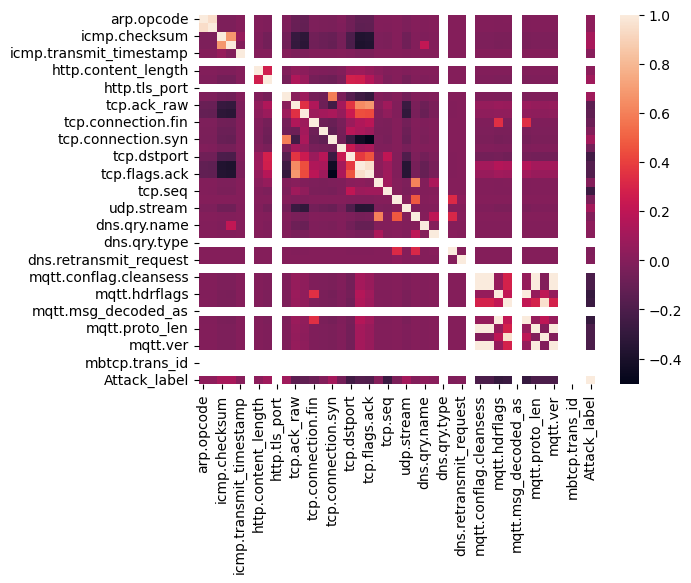

In [ ]:
sns.heatmap(numerical_df.corr())

# Machine Learning Algo application

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [18]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Binary class Modelling

In [23]:
df1 = df.copy()
df1 = df1.drop(["Attack_type"], axis = 1)
df1["Attack_label"].value_counts()

Attack_label
1    133499
0     24301
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_bin = df1.drop(["Attack_label"], axis = 1)
y_bin = df1["Attack_label"]
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, train_size = 0.8)
eval_scores = []

In [25]:
y_test_bin.unique()
target_classes = ['Vulnerability_scanner', 'Normal', 'DDoS_ICMP', 'DDoS_HTTP',
       'SQL_injection', 'Backdoor', 'Password', 'Port_Scanning',
       'Ransomware', 'XSS', 'Uploading', 'DDoS_TCP', 'Fingerprinting']

In [26]:
def fun_for_model_binary(eval_scores):
  models = []
  models.append(("LDA", LinearDiscriminantAnalysis()))
  models.append(("KNN", KNeighborsClassifier()))
  models.append(("CART", DecisionTreeClassifier()))
  models.append(("NB", GaussianNB(var_smoothing=1e-9)))
  # models.append(("SVC", SVC(gamma = "auto")))
  print("Models are: ")
  for name, model in (models):
    print( name)
  print(models)
  names = []
  results = {}
  for name, model in models:
    print(name)
    model.fit(X_train_bin, y_train_bin)
    y_pred_bin = model.predict(X_test_bin)
    y_proba_bin = model.predict_proba(X_test_bin)[:, 1] # probabilities of all positive 1-labeled columns
    kfold_ = KFold(n_splits = 10, random_state = 10, shuffle = True)
    names.append(name)
    results = {
        "Model Name": name,
        "accuracy_score": accuracy_score(y_test_bin, y_pred_bin),
        "recall": recall_score(y_test_bin, y_pred_bin),
        "f1_score": f1_score(y_test_bin, y_pred_bin),
        "roc_auc_score": roc_auc_score(y_test_bin, y_proba_bin),
        "confusion_metrix": confusion_matrix(y_test_bin, y_pred_bin),
        "cross_val_score": cross_val_score(model, X_bin, y_bin, scoring = "accuracy", cv = kfold_).mean(),
        "classification report": classification_report(y_test_bin, y_pred_bin)
    }
    eval_scores.append(results)
    # results_mean.append(cv_results.mean())
    # msg = "%s: %f (%f)" % (model, cv_results.mean(), cv_results.std())
    # print(msg)


In [27]:
def fun_eval_model_binary(eval_scores):
  print("Results of the Binary Classification:\n\n")
  choice = 0
  #choice = int(input("Want to skip confusion_matrix and classification_report (0/1):"))
  if choice == 1: print("Confusion Matrix Skipped for better formatting !\n")

  for eval in eval_scores:
    for key, value in eval.items():
      if choice and (key == "confusion_metrix" or key == "classification report"): continue
      print("\t", key, value)
    print("-" * 80)

* before undersampling

<Axes: ylabel='count'>

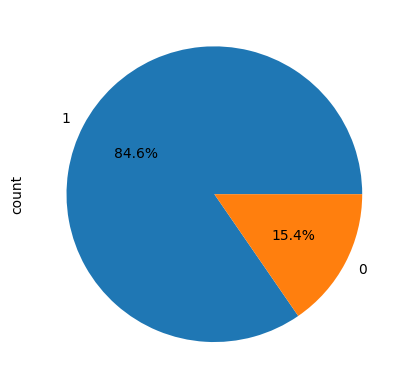

In [28]:
y_bin.value_counts().plot.pie(autopct = "%0.1f%%")

In [ ]:
eval_scores = []
fun_for_model_binary(eval_scores)
fun_eval_model_binary(eval_scores)

Models are: 
LDA
KNN
CART
NB
[('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB())]
LDA
KNN
CART
NB
Results of the Binary Classification:


	 Model Name LDA
	 accuracy_score 0.8483057109680143
	 recall 0.988537465506262
	 f1_score 0.9152728916491422
	 roc_auc_score 0.6572893246070228
	 confusion_metrix [[  823  4041]
 [  270 23285]]
	 cross_val_score 0.8468629738741376
	 classification report               precision    recall  f1-score   support

           0       0.75      0.17      0.28      4864
           1       0.85      0.99      0.92     23555

    accuracy                           0.85     28419
   macro avg       0.80      0.58      0.60     28419
weighted avg       0.84      0.85      0.81     28419

--------------------------------------------------------------------------------
	 Model Name KNN
	 accuracy_score 0.832999049931384
	 recall 0.9461260878794311
	 f1_score 0.9037673871608743
	 roc_auc_

* After oversampling of non-majority class = **0**

In [ ]:
ros = RandomOverSampler(sampling_strategy = "minority")
X_resampled_bin, y_resampled_bin = ros.fit_resample(X_bin, y_bin)

<Axes: ylabel='count'>

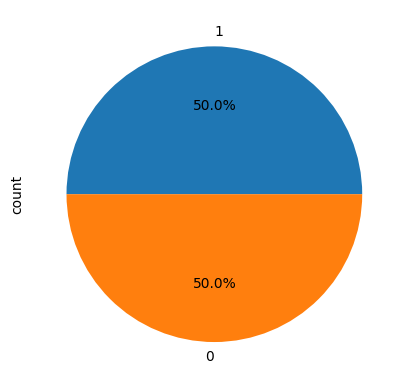

In [ ]:
y_resampled_bin.value_counts().plot.pie(autopct = "%0.1f%%")

In [ ]:
y_bin = y_resampled_bin
X_bin = X_resampled_bin
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, train_size = 0.8)
eval_scores = []
fun_for_model_binary(eval_scores)
fun_eval_model_binary(eval_scores)

Models are: 
LDA
KNN
CART
NB
[('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB())]
LDA
KNN
CART
NB
Results of the Binary Classification:


	 Model Name LDA
	 accuracy_score 0.6054161891421538
	 recall 0.5348325075170457
	 f1_score 0.5760091220068415
	 roc_auc_score 0.6788844163760867
	 confusion_metrix [[15897  7608]
 [10984 12629]]
	 cross_val_score 0.6053534143375195
	 classification report               precision    recall  f1-score   support

           0       0.59      0.68      0.63     23505
           1       0.62      0.53      0.58     23613

    accuracy                           0.61     47118
   macro avg       0.61      0.61      0.60     47118
weighted avg       0.61      0.61      0.60     47118

--------------------------------------------------------------------------------
	 Model Name KNN
	 accuracy_score 0.83339700326839
	 recall 0.7437852030661076
	 f1_score 0.8173399106478034
	 roc_auc_

# Multiclass Modelling

In [19]:
df2 = df.copy()
df2 = df2.drop(["Attack_label"], axis = 1)
df2["Attack_type"].value_counts()

Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: count, dtype: int64

In [38]:
# Prediction for the multiclass columns df

X_type = df2.drop(["Attack_type"], axis = 1)
y_type = df2["Attack_type"]
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_type, y_type, train_size = 0.85)
X_type

,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,tcp.ack,...,udp.port,udp.stream,udp.time_delta,year,month,day,hour,minute,second,microsecond
0,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,2,2,10,8,400536
1,3232235621,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,2,2,10,8,400536
2,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,2,2,10,8,400536
3,3232235621,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,2,2,10,8,400536
4,3232235672,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,2,2,10,8,400536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,3247985195,3232235648,0,0.0,0.0,0,48729.0,40690.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,1,23,24,32,698981
157796,4248043989,3232235648,0,0.0,0.0,0,45657.0,40702.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,1,23,24,32,699354
157797,1805376817,3232235648,0,0.0,0.0,0,57686.0,41423.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,1,23,24,32,719931
157798,1307720420,3232235648,0,0.0,0.0,0,9555.0,42379.0,0.0,0.0,...,0.0,0.0,0.0,2021,1,1,23,24,32,752054


* before oversampling

In [39]:
def fun_for_model_type(eval_scores):
  models = []
  models.append(("LDA", LinearDiscriminantAnalysis()))
  models.append(("KNN", KNeighborsClassifier()))
  models.append(("CART", DecisionTreeClassifier()))
  models.append(("NB", GaussianNB(var_smoothing=1e-9)))
  models.append(("RF", RandomForestClassifier(n_estimators = 10)))
  print("Models are: ")
  for name, model in models:
    print( name, end = " ")
  print("\n", models)
  names = []
  results = {}
  for name, model in models:
    print(name)
    model.fit(X_train_type, y_train_type)
    y_pred_type = model.predict(X_test_type)
    y_proba_type = model.predict_proba(X_test_type)
    kfold_ = KFold(n_splits = 10, random_state = 10, shuffle = True)
    names.append(name)
    results = {
        "Model Name": name,
        "accuracy_score": accuracy_score(y_test_type, y_pred_type),
        "recall": recall_score(y_test_type, y_pred_type, average = "micro"),
        "f1_score": f1_score(y_test_type, y_pred_type, average = "micro"),
        "confusion_metrix": confusion_matrix(y_test_type, y_pred_type),
        "cross_val_score": cross_val_score(model, X_type, y_type, scoring = "accuracy", cv = kfold_).mean(),
        "classification report": classification_report(y_test_type, y_pred_type, zero_division = 1)
    }
    eval_scores.append(results)


In [40]:
def fun_eval_model_type(eval_scores):
  print("Results of the MultiClass Classification:\n\n")
  choice = 0
  #choice = int(input("Want to skip confusion_matrix and classification_report (0/1):"))
  if choice == 1: print("Confusion Matrix and Classification Report Skipped for better formatting !\n")
  for eval in eval_scores:
    for key, value in eval.items():
      if choice and (key == "confusion_metrix" or key == "classification report"): continue
      print("\t", key, value)
    print("-" * 80)

In [41]:
# calling the model_type and its evaluator
eval_scores = []
fun_for_model_type(eval_scores)
fun_eval_model_type(eval_scores)

Models are: 
LDA KNN CART NB RF 
 [('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=10))]
LDA
KNN
CART
NB
RF
Results of the MultiClass Classification:


	 Model Name LDA
	 accuracy_score 0.5222222222222223
	 recall 0.5222222222222223
	 f1_score 0.5222222222222223
	 confusion_metrix [[ 148    0    0    0    0    0    0  755    0   16   12  362  159   58
     5]
 [   0 1555    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0 1836    0    0   31    0   37    0    0    0    0  158    0
     0]
 [   5    0    0  901    0    0    0  372    0    0    6    0  224    0
     0]
 [   0    0    0    0 2198    0    0    1    0    0    0    0    0    0
     0]
 [   0    0   33    0    0   37    0    6    0   12    0    3   56    0
     0]
 [   0    0    0    0   45    0  136    0    0    0    0    0    0    0
     0]
 [ 196  334    0   16    0    0  

In [34]:
df2.dtypes

frame.time                 datetime64[ns]
ip.src_host                         int64
ip.dst_host                         int64
arp.dst.proto_ipv4                  int64
arp.opcode                        float64
arp.hw.size                       float64
arp.src.proto_ipv4                  int64
icmp.checksum                     float64
icmp.seq_le                       float64
icmp.transmit_timestamp           float64
tcp.ack                           float64
tcp.ack_raw                       float64
tcp.checksum                      float64
udp.port                          float64
udp.stream                        float64
udp.time_delta                    float64
Attack_type                        object
year                              float64
month                             float64
day                               float64
hour                              float64
minute                            float64
second                            float64
microsecond                       

<Axes: ylabel='count'>

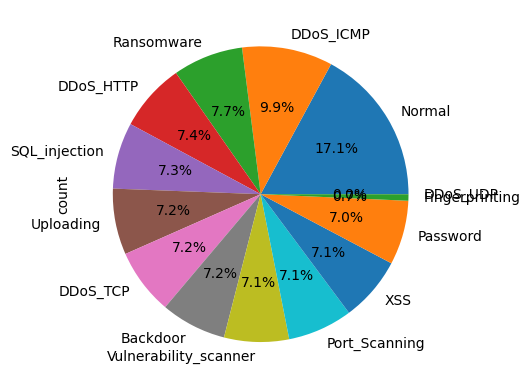

In [ ]:
y_type.value_counts().plot.pie(autopct = "%0.1f%%")

* After oversampling of the minority classes

<Axes: ylabel='count'>

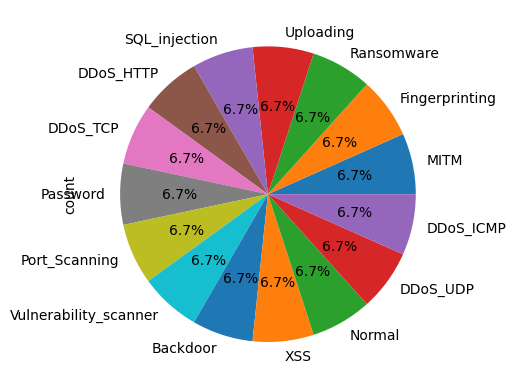

In [42]:
ros = RandomOverSampler(sampling_strategy = "auto")
X_resampled_type, y_resampled_type = ros.fit_resample(X_type, y_type)
y_resampled_type.value_counts().plot.pie(autopct = "%0.1f%%")

In [71]:
y_resampled_type.value_counts()

Attack_type
MITM                     24301
Fingerprinting           24301
Ransomware               24301
Uploading                24301
SQL_injection            24301
DDoS_HTTP                24301
DDoS_TCP                 24301
Password                 24301
Port_Scanning            24301
Vulnerability_scanner    24301
Backdoor                 24301
XSS                      24301
Normal                   24301
DDoS_UDP                 24301
DDoS_ICMP                24301
Name: count, dtype: int64

In [ ]:
y_type = y_resampled_type
X_type = X_resampled_type
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_type, y_type, train_size = 0.8)
eval_scores = []
fun_for_model_type(eval_scores)
fun_eval_model_type(eval_scores)

Models are: 
LDA KNN CART NB RF 
 [('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=10))]
LDA
KNN


# Feature Selection

* on binaryclass modelling

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .95)
X_train_pca_bin = pca.fit_transform(X_train_bin)
X_test_pca_bin = pca.transform(X_test_bin)
X_train_pca_bin.shape

(188470, 4)

In [ ]:
eval_scores = []
fun_for_model_binary(eval_scores)
fun_eval_model_binary(eval_scores)

Models are: 
LDA
KNN
CART
NB
[('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB())]
LDA
KNN
CART
NB
Results of the Binary Classification:


	 Model Name LDA
	 accuracy_score 0.6054161891421538
	 recall 0.5348325075170457
	 f1_score 0.5760091220068415
	 roc_auc_score 0.6788844163760867
	 confusion_metrix [[15897  7608]
 [10984 12629]]
	 cross_val_score 0.6053534143375195
	 classification report               precision    recall  f1-score   support

           0       0.59      0.68      0.63     23505
           1       0.62      0.53      0.58     23613

    accuracy                           0.61     47118
   macro avg       0.61      0.61      0.60     47118
weighted avg       0.61      0.61      0.60     47118

--------------------------------------------------------------------------------
	 Model Name KNN
	 accuracy_score 0.83339700326839
	 recall 0.7437852030661076
	 f1_score 0.8173399106478034
	 roc_auc_

* on multiclass modelling

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_pca_type = pca.fit_transform(X_train_type)
X_test_pca_type = pca.transform(X_test_type)
X_train_pca_type.shape

(272171, 4)

In [ ]:
# training of the model on selected features
eval_scores = []
fun_for_model_type(eval_scores)
fun_eval_model_type(eval_scores)

Models are: 
LDA KNN CART NB RF 
 [('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('RF', RandomForestClassifier(n_estimators=10))]
LDA
KNN
CART
NB
RF
Results of the MultiClass Classification:


	 Model Name LDA
	 accuracy_score 0.546066457975104
	 recall 0.546066457975104
	 f1_score 0.546066457975104
	 confusion_metrix [[1426    0    0    9    0   27   62  265   33  316 1134  641  592  267]
 [   0 4945    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3902   13    0  905    0    0    0    0    0   60    0    0]
 [  37    0    0 3511    0    0  158    0    4   39    0 1012    0    0]
 [   0    0    0    0 4757    0    0    0    0    0    0    0    0    0]
 [  70    0    0    0    0 3165  269    0    0    0   89 1424    0    0]
 [ 481  478    0   49    0    2  808  359    7  763  761  599  338  213]
 [ 979  274    0    1    0    2    1  343    1  642  687  580  805  551]
 [  58   93 

# HyperParameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
def param_tuning(X, y):
  models = {
      "KNN":{
          "model": KNeighborsClassifier(),
          "params": {
          "n_neighbors": [i for i in range(1, 15, 2)]
          }
      },
      "RF": {
          "model": RandomForestClassifier(),
          "params": {
              "max_depth": [10, 11, 12, 13],
              "max_features": list(range(1, len(df.columns) + 1))
          }
      },
      "CART": {
          "model": DecisionTreeClassifier(),
          "params": {
              "max_depth": [10, 11, 12, 13],
              "max_features": list(range(1, len(df.columns) + 1))
      }
    }
  }
  scores = []
  for model_name, model_params in models.items():
    print(model_name)
    clf = RandomizedSearchCV(model_params["model"], model_params["params"], cv = 5, n_jobs = -1)
    clf.fit(X, y)
    scores.append([
        model_name,
        clf.best_params_,
        clf.best_score_
    ])
  return scores

* for binary class modelling

In [ ]:
param_tuning(X_bin, y_bin)

# Notebook Ends Here !!!

In [ ]:
print("End of the notebook !")